# Desafio Análise Multivariada


### Nome: Renata Pereira

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/renat/Desktop/Coderhouse/20. Analise Bivariada e Multivariada-20240903T184634Z-001/20. Analise Bivariada e Multivariada/Aula 20 - Análise Multivariada/desafios/IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


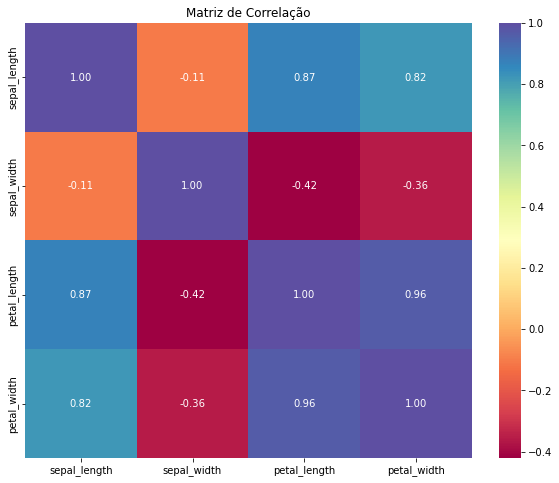

In [8]:
# Remover a coluna 'species' do DataFrame para calcular a correlação entre as variáveis numéricas
df_numeric = df.drop(columns=['species'])

# Criar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Spectral', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


In [9]:
# Regressão Linear Múltipla

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecionando as variáveis independentes (features) e a variável dependente (target)
X = df.drop(columns=['petal_width', 'species'])  # Usamos todas as outras características para prever a largura da pétala
y = df['petal_width']  # Variável dependente

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear múltipla
model = LinearRegression()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados da regressão
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

# Exibindo os coeficientes de maneira mais interpretável
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
coef_df



Coeficientes: [-0.23786906  0.24296112  0.5367048 ]
Intercepto: -0.17909974053441302
Erro Quadrático Médio (MSE): 0.05
Coeficiente de Determinação (R²): 0.93


,Coeficiente
sepal_length,-0.237869
sepal_width,0.242961
petal_length,0.536705


Vemos que o MSE de 0,05 é pequeno, e aliado ao Coeficiente de Determinação alto de 0,93 podemos afirmar que o modelo de regressão é bom. 

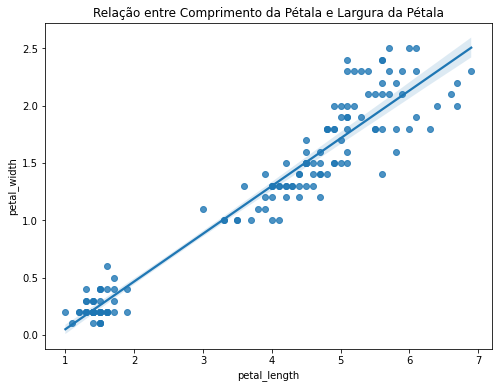

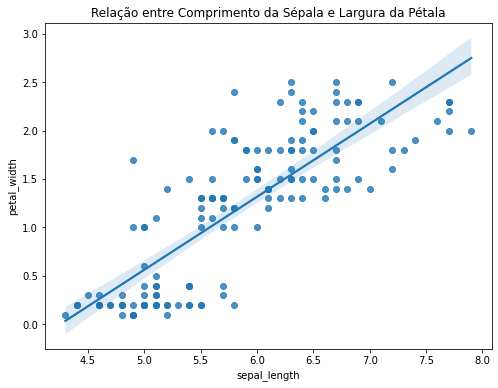

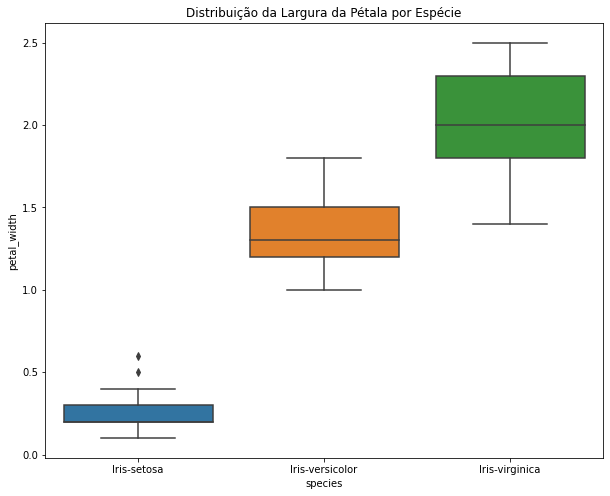

In [10]:
# Gráfico 1: Relação entre 'petal_length' e 'petal_width' com regressão linear
plt.figure(figsize=(8, 6))
sns.regplot(x='petal_length', y='petal_width', data=df)
plt.title('Relação entre Comprimento da Pétala e Largura da Pétala')
plt.show()

# Gráfico 2: Relação entre 'sepal_length' e 'petal_width' com regressão linear
plt.figure(figsize=(8, 6))
sns.regplot(x='sepal_length', y='petal_width', data=df)
plt.title('Relação entre Comprimento da Sépala e Largura da Pétala')
plt.show()

# Gráfico 3: Boxplot das variáveis por espécie
plt.figure(figsize=(10, 8))
sns.boxplot(x='species', y='petal_width', data=df)
plt.title('Distribuição da Largura da Pétala por Espécie')
plt.show()
